In [717]:
import sys
sys.path.append("../../src")

In [718]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [719]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [720]:
import data

In [721]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id",
                             "practice_sentence"))

EXPERIMENT_ID = "01_production_swarm-topicality"
response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "survey-multi-choice-ext")] \
    .reset_index().set_index(["uniqueid", "trial_index"])

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.


In [722]:
response_df.head()

condition  \
uniqueid                                      trial_index              
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3                    0   
                                              5                    0   
                                              6                    0   
                                              7                    0   
                                              8                    0   

                                                           counterbalance  \
uniqueid                                      trial_index                   
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3                         0   
                                              5                         0   
                                              6                         0   
                                              7                         0   
                                              8                         0   

                                                                             assignmentId  \
uniqueid                                      trial_index                                   
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3            3GNA64GUZFSNSEHDRMD022E61N3Q5E   
                                              5            3GNA64GUZFSNSEHDRMD022E61N3Q5E   
                                              6            3GNA64GUZFSNSEHDRMD022E61N3Q5E   
                                              7            3GNA64GUZFSNSEHDRMD022E61N3Q5E   
                                              8            3GNA64GUZFSNSEHDRMD022E61N3Q5E   

                                                                 workerId  \
uniqueid                                      trial_index                   
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3            A3USIBCXS5QHH9   
                                              5            A3USIBCXS5QHH9   
                                              6            A3USIBCXS5QHH9   
                                              7            A3USIBCXS5QHH9   
                                              8            A3USIBCXS5QHH9   

                                                                                    hitId  \
uniqueid                                      trial_index                                   
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3            38F60IALAG5Y23PBLIWH2SXC96S0T5   
                                              5            38F60IALAG5Y23PBLIWH2SXC96S0T5   
                                              6            38F60IALAG5Y23PBLIWH2SXC96S0T5   
                                              7            38F60IALAG5Y23PBLIWH2SXC96S0T5   
                                              8            38F60IALAG5Y23PBLIWH2SXC96S0T5   

                                                                        trial_type  \
uniqueid                                      trial_index                            
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3            survey-multi-choice-ext   
                                              5            survey-multi-choice-ext   
                                              6            survey-multi-choice-ext   
                                              7            survey-multi-choice-ext   
                                              8            survey-multi-choice-ext   

                                                               rt  \
uniqueid                                      trial_index           
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3            3472.0   
                                              5            3103.8   
                                              6            2989.3   
                                              7            2150.4   
                                              8            1653.9   

                                                          internal_node_id  \
uniqu

In [723]:
# Expand condition labels, which are tuples
response_df = pd.concat([response_df, response_df.condition_id.apply(pd.Series).rename(columns=lambda x: f"condition_{x}")], axis=1) \
    .drop(columns="condition_id")

In [724]:
# Convert condition_id to independent features
response_df["agent_is_topic"] = response_df["condition_0"] == 1

In [725]:
# dtype fixes
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [726]:
response_df.head()

condition  \
uniqueid                                      trial_index              
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3                    0   
                                              5                    0   
                                              6                    0   
                                              7                    0   
                                              8                    0   

                                                           counterbalance  \
uniqueid                                      trial_index                   
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3                         0   
                                              5                         0   
                                              6                         0   
                                              7                         0   
                                              8                         0   

                                                                             assignmentId  \
uniqueid                                      trial_index                                   
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3            3GNA64GUZFSNSEHDRMD022E61N3Q5E   
                                              5            3GNA64GUZFSNSEHDRMD022E61N3Q5E   
                                              6            3GNA64GUZFSNSEHDRMD022E61N3Q5E   
                                              7            3GNA64GUZFSNSEHDRMD022E61N3Q5E   
                                              8            3GNA64GUZFSNSEHDRMD022E61N3Q5E   

                                                                 workerId  \
uniqueid                                      trial_index                   
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3            A3USIBCXS5QHH9   
                                              5            A3USIBCXS5QHH9   
                                              6            A3USIBCXS5QHH9   
                                              7            A3USIBCXS5QHH9   
                                              8            A3USIBCXS5QHH9   

                                                                                    hitId  \
uniqueid                                      trial_index                                   
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3            38F60IALAG5Y23PBLIWH2SXC96S0T5   
                                              5            38F60IALAG5Y23PBLIWH2SXC96S0T5   
                                              6            38F60IALAG5Y23PBLIWH2SXC96S0T5   
                                              7            38F60IALAG5Y23PBLIWH2SXC96S0T5   
                                              8            38F60IALAG5Y23PBLIWH2SXC96S0T5   

                                                                        trial_type  \
uniqueid                                      trial_index                            
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3            survey-multi-choice-ext   
                                              5            survey-multi-choice-ext   
                                              6            survey-multi-choice-ext   
                                              7            survey-multi-choice-ext   
                                              8            survey-multi-choice-ext   

                                                               rt  \
uniqueid                                      trial_index           
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E 3            3472.0   
                                              5            3103.8   
                                              6            2989.3   
                                              7            2150.4   
                                              8            1653.9   

                                                          internal_node_id  \
uniqu

In [727]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [728]:
subjects = set(response_df.index.get_level_values("uniqueid"))
len(subjects)

46

### Demo

In [729]:
raw_df.dateTime.max()

1628789837160

In [730]:
qualitative_df = raw_df[((raw_df.experiment_id == EXPERIMENT_ID) | ((raw_df.dateTime >= 1628711775008) & (raw_df.dateTime <= 1628783606933))) & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

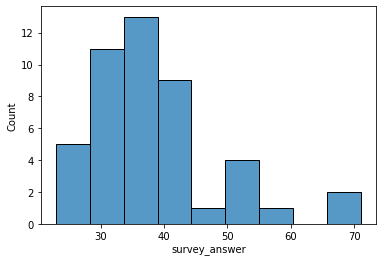

In [731]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [732]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree    32
Master's degree      10
Some college          3
High school/GED       1
Name: survey_answer, dtype: int64

In [733]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    46
Name: survey_answer, dtype: int64

### Comments

In [734]:
qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer

trial_index  uniqueid                                     
35           A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E                                           very good 
             A18HYCTEAGVORM:3II4UPYCOKVIWRW66SVJ0E2YE42DQA                        It was an interesting survey.
             AC8SDFZQLAOJE:3WEV0KO0ONGU97BJYWKOVEHZWSNDSZ                                                  good
             A2XISYL8BR08AV:3PB5A5BD0WUB2T1ICJNL68O0M6Q7GG                                                   No
             A1NZFJHVJ9CNTO:31HQ4X3T3TYD7JZBBDICERP451PLSN                                                     
             AM6BV9CKRWF2K:35GMH2SV3F5K3LXQNAEZHRPJZFLOE6                                                    NA
             A1GBRWJPBC3S5:3S96KQ6I9NSVO7OYNWPE5JDLYB1DTO                                                  Good
             AJRY9ALX8069Y:3A0EX8ZRN9CYQWP8J6L7IAH0AS6YBQ                                                     x
             A2R75YFKVALBXE:3KRVW3HTZO9XD1HWB

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

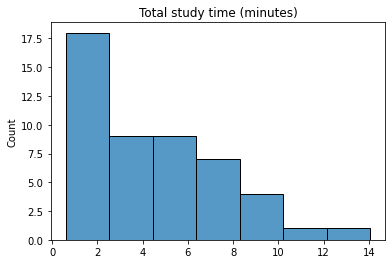

In [735]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [736]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    4.443532
std     3.159298
Name: rt, dtype: float64

### Response times

In [737]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

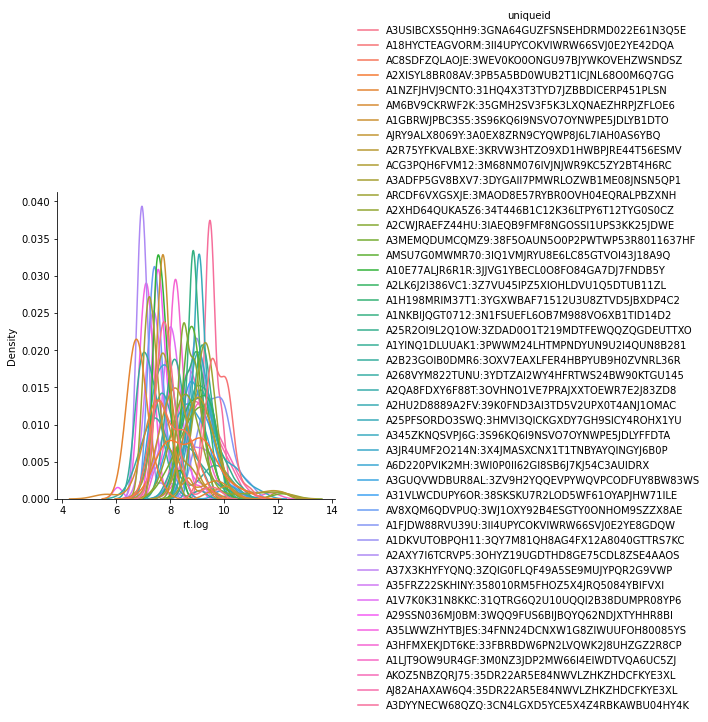

In [738]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

## Attention checks

### Practice round

In [739]:
practice_attention_failures = response_df[response_df.practice_sentence == True].survey_answer == "bad"
practice_attention_failures = practice_attention_failures.loc[practice_attention_failures]
practice_attention_failures

uniqueid                                       trial_index
AC8SDFZQLAOJE:3WEV0KO0ONGU97BJYWKOVEHZWSNDSZ   3              True
ACG3PQH6FVM12:3M68NM076IVJNJWR9KC5ZY2BT4H6RC   3              True
A3ADFP5GV8BXV7:3DYGAII7PMWRLOZWB1ME08JNSN5QP1  3              True
A6D220PVIK2MH:3WI0P0II62GI8SB6J7KJ54C3AUIDRX   3              True
A1V7K0K31N8KKC:31QTRG6Q2U10UQQI2B38DUMPR08YP6  3              True
A29SSN036MJ0BM:3WQQ9FUS6BIJBQYQ62NDJXTYHHR8BI  3              True
A35LWWZHYTBJES:34FNN24DCNXW1G8ZIWUUFOH80085YS  3              True
A3HFMXEKJDT6KE:33FBRBDW6PN2LVQWK2J8UHZGZ2R8CP  3              True
Name: survey_answer, dtype: bool

### Fillers

<AxesSubplot:xlabel='survey_answer'>

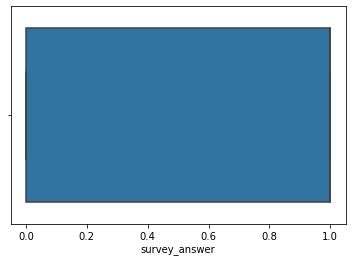

In [740]:
# some fillers aren't good, upon reflection. drop them from evaluation
drop_fillers = [6]

filler_stats = response_df[response_df.condition_0 == "filler"].reset_index() \
    .groupby(["uniqueid", "item_id", "condition_1"]).apply(lambda xs: (xs[~xs.item_id.isin(drop_fillers)].survey_answer == "good").astype(float))
sns.boxplot(data=filler_stats.reset_index(), x="survey_answer", hue="uniqueid")

In [741]:
filler_stats_summary = filler_stats.groupby("uniqueid").mean()
filler_stats_summary.sort_values()

uniqueid
A3GUQVWDBUR8AL:3ZV9H2YQQEVPYWQVPCODFUY8BW83WS    0.181818
A268VYM822TUNU:3YDTZAI2WY4HFRTWS24BW90KTGU145    0.181818
AM6BV9CKRWF2K:35GMH2SV3F5K3LXQNAEZHRPJZFLOE6     0.363636
ACG3PQH6FVM12:3M68NM076IVJNJWR9KC5ZY2BT4H6RC     0.363636
A1V7K0K31N8KKC:31QTRG6Q2U10UQQI2B38DUMPR08YP6    0.363636
AV8XQM6QDVPUQ:3WJ1OXY92B4ESGTY0ONHOM9SZZX8AE     0.454545
A3USIBCXS5QHH9:3GNA64GUZFSNSEHDRMD022E61N3Q5E    0.454545
A3MEMQDUMCQMZ9:38F5OAUN5O0P2PWTWP53R8011637HF    0.454545
A2B23GOIB0DMR6:3OXV7EAXLFER4HBPYUB9H0ZVNRL36R    0.454545
AKOZ5NBZQRJ75:35DR22AR5E84NWVLZHKZHDCFKYE3XL     0.545455
AJ82AHAXAW6Q4:35DR22AR5E84NWVLZHKZHDCFKYE3XL     0.545455
A37X3KHYFYQNQ:3ZQIG0FLQF49A5SE9MUJYPQR2G9VWP     0.545455
A35LWWZHYTBJES:34FNN24DCNXW1G8ZIWUUFOH80085YS    0.545455
A2HU2D8889A2FV:39K0FND3AI3TD5V2UPX0T4ANJ1OMAC    0.545455
A10E77ALJR6R1R:3JJVG1YBECL0O8FO84GA7DJ7FNDB5Y    0.545455
A1GBRWJPBC3S5:3S96KQ6I9NSVO7OYNWPE5JDLYB1DTO     0.545455
A1NZFJHVJ9CNTO:31HQ4X3T3TYD7JZBBDICERP451PLSN    0.545455
A1YIN

<AxesSubplot:xlabel='item_id', ylabel='survey_answer'>

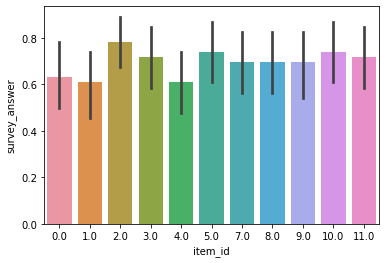

In [742]:
sns.barplot(data=filler_stats.reset_index(), x="item_id", y="survey_answer")

In [743]:
# What are fillers that are commonly missed, for high-scoring people?
tmp = filler_stats.loc[filler_stats_summary[filler_stats_summary > 0.7].index]
tmp[tmp == 0].groupby(["item_id", "condition_1"]).size().sort_values(ascending=False)

item_id  condition_1   
7.0      mwe               5
1.0      mwe               4
4.0      mwe               4
11.0     order             4
8.0      order             3
9.0      active-passive    3
0.0      active-passive    2
3.0      active-passive    2
5.0      order             2
2.0      order             1
10.0     mwe               1
Name: survey_answer, dtype: int64

## Final data processing

In [744]:
exp_items = response_df[(response_df.condition_0 != "filler") & response_df.practice_sentence.isna()]

### Filter based on practice and attention checks

In [745]:
drop_pct = np.round(len(practice_attention_failures) / len(filler_stats_summary.index) * 100, 1)
print(f"{len(practice_attention_failures)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(practice_attention_failures.index.get_level_values("uniqueid")))
exp_items = exp_items.drop(practice_attention_failures.index.get_level_values("uniqueid"), level="uniqueid")

attention_drops = filler_stats_summary[(filler_stats_summary < 0.7)]
drop_pct = np.round(len(attention_drops) / len(filler_stats_summary.index) * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

8 subjects (17.4%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	AC8SDFZQLAOJE:3WEV0KO0ONGU97BJYWKOVEHZWSNDSZ
	ACG3PQH6FVM12:3M68NM076IVJNJWR9KC5ZY2BT4H6RC
	A3ADFP5GV8BXV7:3DYGAII7PMWRLOZWB1ME08JNSN5QP1
	A6D220PVIK2MH:3WI0P0II62GI8SB6J7KJ54C3AUIDRX
	A1V7K0K31N8KKC:31QTRG6Q2U10UQQI2B38DUMPR08YP6
	A29SSN036MJ0BM:3WQQ9FUS6BIJBQYQ62NDJXTYHHR8BI
	A35LWWZHYTBJES:34FNN24DCNXW1G8ZIWUUFOH80085YS
	A3HFMXEKJDT6KE:33FBRBDW6PN2LVQWK2J8UHZGZ2R8CP
22 subjects (47.8%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	A10E77ALJR6R1R:3JJVG1YBECL0O8FO84GA7DJ7FNDB5Y
	A1GBRWJPBC3S5:3S96KQ6I9NSVO7OYNWPE5JDLYB1DTO
	A1NZFJHVJ9CNTO:31HQ4X3T3TYD7JZBBDICERP451PLSN
	A1V7K0K31N8KKC:31QTRG6Q2U10UQQI2B38DUMPR08YP6
	A1YINQ1DLUUAK1:3PWWM24LHTMPNDYUN9U2I4QUN8B281
	A268VYM822TUNU:3YDTZAI2WY4HFRTWS24BW90KTGU145
	A2AXY7I6TCRVP5:3OHYZ19UGDTHD8GE75CDL8ZSE4AAOS
	A2B23GOIB0DMR6:3OXV7EAXLFER4HBPYUB9H0ZVNRL36R
	A2HU2D8889A2FV:39K0FND3AI3

In [746]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

20 subjects remaining.


### Compute match

In [747]:
exp_items["match"] = exp_items.apply(lambda r: r.survey_answer == ("agent" if r.agent_is_topic else "location"), axis=1)

### Merge in materials

In [748]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [749]:
keep_cols = ["A", "V", "L", "AV", "A concrete?", "A countable?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Export

In [750]:
merged_df.to_csv("merged_df.csv")

## Analysis

<AxesSubplot:xlabel='agent_is_topic', ylabel='match'>

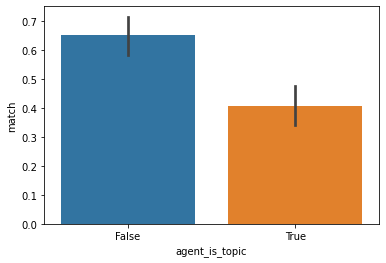

In [751]:
sns.barplot(data=exp_items.reset_index(), x="agent_is_topic", y="match")

### Item exposure

In [752]:
merged_df[merged_df.condition_0 != "filler"] \
    .groupby(["item_id", "AV", "agent_is_topic"]).size().sort_values()

item_id  AV                 agent_is_topic
17.0     debris flow        False              7
6.0      terror cours       True               7
64.0     worms wriggl       False              7
39.0     sewage runn        False              8
2.0      ants crawl         False              8
31.0     excitement puls    True               8
4.0      people bustl       True               8
5.0      conversation buzz  True               8
30.0     fear prickl        True               9
25.0     energy humm        False              9
24.0     frogs hopp         True               9
22.0     lights glow        False              9
19.0     bubbles foam       False              9
8.0      cockroaches creep  False              9
0.0      bees swarm         False              9
56.0     tadpoles swimm     False              9
7.0      excitement crackl  False              9
3.0      trumpets ring      True               9
0.0      bees swarm         True              11
3.0      trumpets ring    

### Concreteness

<AxesSubplot:xlabel='agent_is_topic', ylabel='match'>

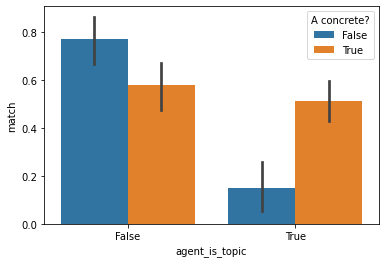

In [753]:
sns.barplot(data=merged_df[merged_df.condition_0 != "filler"].reset_index(), x="agent_is_topic", y="match", hue="A concrete?")

item vignettes corresponding to above barplot, as a reminder:

- ~agent_is_topic
    - ~concrete: The restaurant across the street was empty, but {the theater was crackling with excitement / excitement was crackling in the theater}.
    - concrete: The cart is mostly clean by this point, but {the bucket is wriggling with worms / worms are wriggling in the bucket}.
- agent_is_topic
    - ~concrete: X was worried the crowd would be asleep by this time of night, but {excitement is crackling in the theater / the theater is crackling with excitement}.
    - concrete: X was looking for fresh fruit, but {worms are wriggling in the bucket / the bucket is wriggling with worms}. 

<AxesSubplot:xlabel='A concrete?', ylabel='agent_is_subject'>

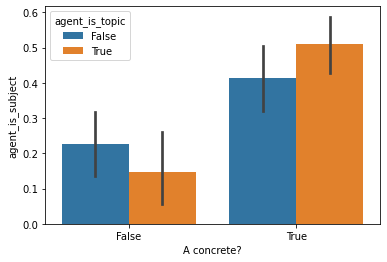

In [754]:
merged_df["agent_is_subject"] = merged_df.survey_answer == "agent"
sns.barplot(data=merged_df.reset_index(), x="A concrete?", y="agent_is_subject", hue="agent_is_topic")

<AxesSubplot:xlabel='Agent subject(Agent topic - Location topic)', ylabel='Count'>

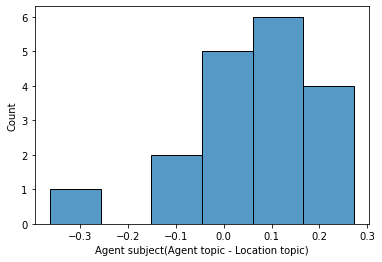

In [755]:
def compute_item_differences(rows):
    rows = rows.set_index("agent_is_topic")
    return rows.loc[True, "agent_is_subject"].mean() - rows.loc[False, "agent_is_subject"].mean()
item_differences = merged_df.groupby(["item_id", "A concrete?"]).apply(compute_item_differences).rename("Agent subject(Agent topic - Location topic)")
sns.histplot(item_differences)

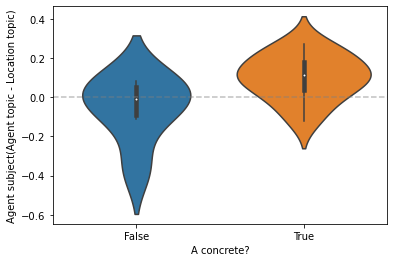

In [756]:
ax = sns.violinplot(data=item_differences.reset_index(), y="Agent subject(Agent topic - Location topic)", x="A concrete?")
ax.axhline(0.0, c="gray", alpha=0.5, linestyle="--")

In [757]:
# bootstrap-estimate difference for concrete items, resampling by item
def f(rows):
    pos_rows = [agent_is_subject for agent_is_topic, agent_is_subject in rows if agent_is_topic]
    neg_rows = [agent_is_subject for agent_is_topic, agent_is_subject in rows if not agent_is_topic]
    return np.mean(pos_rows) - np.mean(neg_rows)

def estimate_bootstrap(rows):
    item_difference_bootstrap = sns.algorithms.bootstrap(rows[["agent_is_topic", "agent_is_subject"]], units=rows.item_id, func=f)
    item_difference_ci = np.percentile(item_difference_bootstrap, [0.25, 0.975])
    return pd.Series({"low": item_difference_ci[0], "high": item_difference_ci[1]})

merged_df.groupby("A concrete?").apply(estimate_bootstrap)

,low,high
A concrete?,,
False,-0.333712,-0.288365
True,-0.102108,-0.071153


### By subject

<AxesSubplot:xlabel='uniqueid', ylabel='match'>

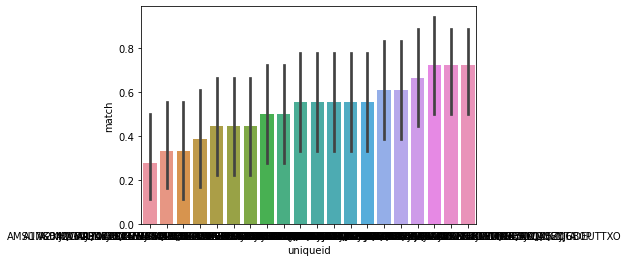

In [758]:
graph_data = merged_df[merged_df.condition_0 != "filler"].reset_index()
order = graph_data.groupby("uniqueid").match.mean().sort_values().index
sns.barplot(data=merged_df[merged_df.condition_0 != "filler"].reset_index(),
            x="uniqueid", order=order,
            y="match")

<AxesSubplot:xlabel='uniqueid', ylabel='match'>

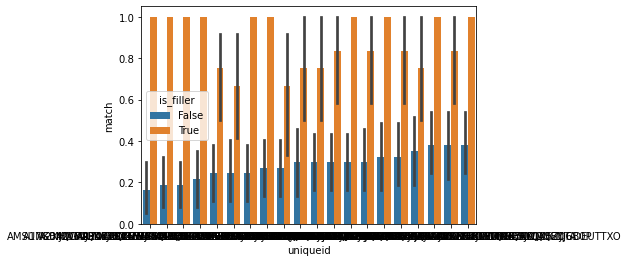

In [759]:
# correlation between filler performance and match?
order = merged_df.groupby("uniqueid").match.mean().sort_values().index

# Bring back the fillers!
filler_data = response_df.loc[set(merged_df.index.get_level_values("uniqueid"))].copy()
filler_data["match"] = "good" == filler_data.survey_answer
graph_data = pd.concat([merged_df, filler_data])
graph_data["is_filler"] = graph_data.condition_0 == "filler"

sns.barplot(data=graph_data.reset_index(), x="uniqueid", order=order, y="match", hue="is_filler")

### By item

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'fear prickl'),
  Text(1, 0, 'debris flow'),
  Text(2, 0, 'energy humm'),
  Text(3, 0, 'lights glow'),
  Text(4, 0, 'cockroaches creep'),
  Text(5, 0, 'excitement crackl'),
  Text(6, 0, 'ants crawl'),
  Text(7, 0, 'terror cours'),
  Text(8, 0, 'people bustl'),
  Text(9, 0, 'excitement puls'),
  Text(10, 0, 'bubbles foam'),
  Text(11, 0, 'bees swarm'),
  Text(12, 0, 'trumpets ring'),
  Text(13, 0, 'worms wriggl'),
  Text(14, 0, 'frogs hopp'),
  Text(15, 0, 'conversation buzz'),
  Text(16, 0, 'tadpoles swimm'),
  Text(17, 0, 'sewage runn')])

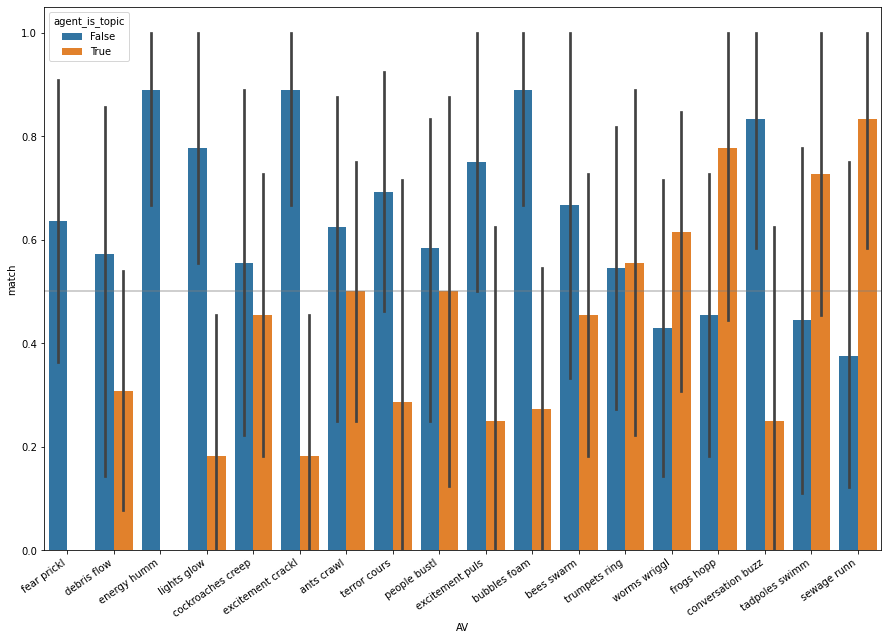

In [760]:
f, ax = plt.subplots(figsize=(15, 10))
ax.axhline(0.5, c="gray", alpha=0.5)

order = merged_df.groupby("AV").match.mean().sort_values().index
sns.barplot(data=merged_df.reset_index(), x="AV", order=order, hue="agent_is_topic", y="match")
plt.xticks(rotation=35, ha="right")